In [17]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_csv("breastCancer.csv")
data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
#Data Preprocessing
data.drop_duplicates(inplace=True)

data.rename(columns={'class':'Diagnosis'},inplace=True)

data.dropna(subset=['bare_nucleoli'],inplace=True)

new_label=LabelEncoder()
data['Diagnosis']=new_label.fit_transform(data['Diagnosis'])
data['bare_nucleoli']=data['bare_nucleoli'].astype(str)
median_value=data['bare_nucleoli'][data['bare_nucleoli'].str.isnumeric()].median()
data['bare_nucleoli']=data['bare_nucleoli'].replace('?',median_value).astype(int)

In [5]:
#To split the data into train and test
X=data.drop(columns=['Diagnosis'])
Y=data['Diagnosis']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [6]:
#To print the data in the x_train part
X_train

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
329,760239,10,4,6,4,5,10,7,1,1
125,1176406,1,1,1,1,2,1,2,1,1
395,1168278,3,1,1,1,2,1,2,1,1
326,752904,10,1,1,1,2,10,5,4,1
589,1272166,5,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
7,1018561,2,1,2,1,2,1,3,1,1
679,1368882,2,1,1,1,2,1,1,1,1
108,1171710,1,1,1,1,2,1,2,3,1
15,1047630,7,4,6,4,6,1,4,3,1


In [9]:
#To print the data in the y_train part
Y_train

329    1
125    0
395    0
326    1
589    0
      ..
7      0
679    0
108    0
15     1
94     0
Name: Diagnosis, Length: 552, dtype: int64

In [10]:
#To print the data in the x_test part
X_test

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
563,1328755,3,1,1,1,2,1,2,1,1
163,1197440,1,1,1,2,1,3,1,1,7
185,1206089,2,1,1,1,1,1,3,1,1
269,385103,1,1,1,1,2,1,3,1,1
461,1268804,3,1,1,1,2,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...
617,1057067,1,1,1,1,1,1,1,1,1
279,476903,10,5,7,3,3,7,3,3,8
146,1185609,3,4,5,2,6,8,4,1,1
443,734111,1,1,1,1,2,2,1,1,1


In [11]:
#To print the data in the y_test part
Y_test

563    0
163    0
185    0
269    0
461    0
      ..
617    0
279    1
146    1
443    0
173    1
Name: Diagnosis, Length: 139, dtype: int64

In [13]:
#To define the randomforest function
rf=RandomForestClassifier()

#To fit the training dataset into the model
rf.fit(X_train,Y_train)

#To predict the diagnosis value for the testing dataset
Y_pred=rf.predict(X_test)

#To check and compare the predicted value and the actual value by calculating accuracy,r2 score and mse score
accuracy=accuracy_score(Y_test,Y_pred)*100
r2=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)

print(f"The Accuracy of the model is:{accuracy:.2f}")
print(f"The r2 score of the model is:{r2:.2f}")
print(f"The mse score oof the model is:{mse:.2f}")

The Accuracy of the model is:98.56
The r2 score of the model is:0.94
The mse score oof the model is:0.01


In [20]:
#To visualise the features importances by the model
importances=rf.feature_importances_

In [21]:
#Sort the features by importance
sorted_idx=importances.argsort()

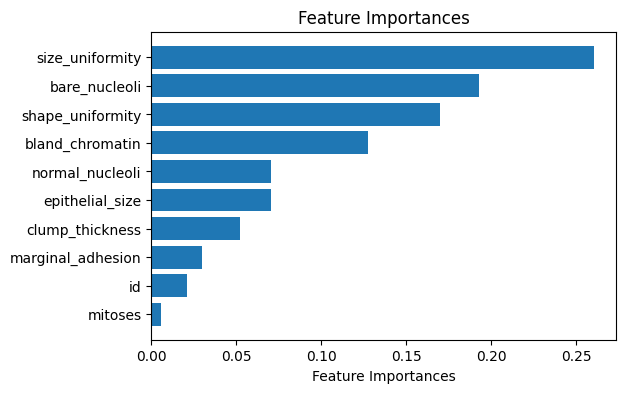

In [22]:
#Plot feature importances
plt.figure(figsize=(6,4))
plt.barh(range(X_train.shape[1]),importances[sorted_idx],align='center')
plt.yticks(range(X_train.shape[1]),X_train.columns[sorted_idx])
plt.xlabel('Feature Importances')
plt.title('Feature Importances')
plt.show()

In [25]:
#To save the model
joblib.dump(rf,'joblib_model.pkl')

['joblib_model.pkl']